<a href="https://colab.research.google.com/github/shalabhs45/ML/blob/main/USML/UML1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

X_train = np.loadtxt("/content/drive/MyDrive/DS-Assignment/USML/X_train.txt")
y_train = np.loadtxt("/content/drive/MyDrive/DS-Assignment/USML/y_train.txt").astype(int)

X_test = np.loadtxt("/content/drive/MyDrive/DS-Assignment/USML/X_test.txt")
y_test = np.loadtxt("/content/drive/MyDrive/DS-Assignment/USML/y_test.txt").astype(int)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Write a function to merge training and testing numpy arrays together as we are going to do unsupervised learning and we don't need separate data

In [ ]:
# Solution
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

2. Write a code to transform the data using PCA  to cover the 80% of the variance of the original (scaled) data?

In [ ]:
# Solution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.8, random_state=123).fit(X_scaled)
X_pca = pca.transform(X_scaled)

3. How many principal components cover 80% of the variance in data?

In [ ]:
# Solution
X_pca.shape[1]

27

4. What percentage of the variance is covered by the top 3 principal components?

In [ ]:
# Solution
total_var = 0.0
for i in range (0, 3):
  total_var += round(float(pca.explained_variance_ratio_[i] * 100))
print(total_var)
X_pca

60.0


array([[-1.63809798e+01,  1.99508307e+00,  3.41569023e+00, ...,
        -1.37584849e+00, -2.99388802e+00, -2.60722020e+00],
       [-1.55821733e+01,  1.18259368e+00, -3.21206753e-01, ...,
        -7.35784858e-01,  1.97132483e-01,  6.87173471e-01],
       [-1.54239892e+01,  2.24316643e+00, -1.23778356e+00, ...,
        -3.34213432e-01,  1.18486029e+00,  1.37731623e-02],
       ...,
       [ 1.18468531e+01, -3.43356502e+00,  2.18801926e+00, ...,
         2.14204376e+00, -1.66880691e+00,  1.22142360e+00],
       [ 8.20668637e+00, -4.38648876e+00,  1.31871955e+00, ...,
        -3.20230158e-01, -2.11340041e+00, -2.64556465e-01],
       [ 9.31117251e+00, -3.98616133e+00,  1.93301747e+00, ...,
        -2.56045735e-02, -1.57906250e+00,  1.14867401e+00]])

5. Write a code to visualize data on a 2-D plot

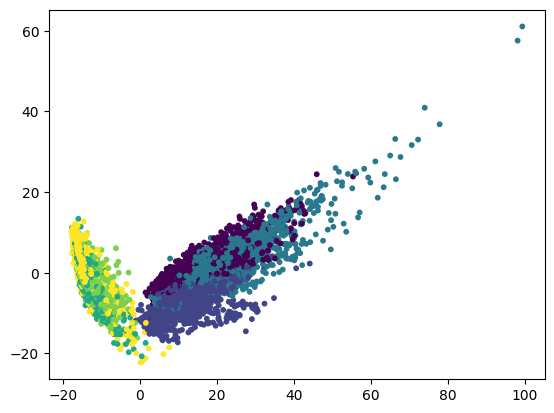

In [ ]:
# Solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10);

6. Perform k-means clustering and plot SSE to find out the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

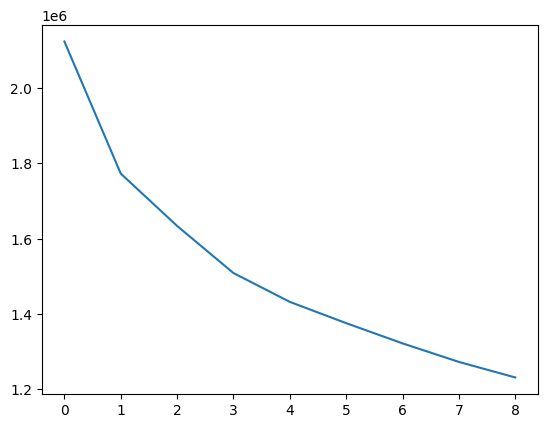

In [ ]:
# Solution
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)

Remember that each label in y represents
* 1 - WALKING
* 2 - WALKING_UPSTAIRS
* 3 - WALKING_DOWNSTAIRS
* 4 - SITTING
* 5 - STANDING
* 6 - LAYING

7. Calculate the SSE for 6 clusters using k-means

In [ ]:
# Solution
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)
print(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1444596.4412391023


8. Compare the Silhouette score of k-means and Agglomerative clustering

In [ ]:
# Solution
ag = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X_pca)

print("K-means: ", silhouette_score(X_pca, kmeans.labels_, metric='euclidean'))
print("Hierarchical: ", silhouette_score(X_pca, ag.labels_, metric='euclidean'))

K-means:  0.1793956613575016
Hierarchical:  0.1743240043954723


9. Perform DBSCAN clustering with <i>epsilon</i>=10 and <i>min_samples</i>=5

In [ ]:
# Solution
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_pca)

DBSCAN(eps=10)

10. Compare the silhoutte score of DBSCAN with earlier clustering methods.

In [ ]:
# Solution
silhouette_avg = silhouette_score(X_pca, dbscan.labels_)
print(silhouette_avg)

0.19367253514821117
